In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from tqdm import tqdm

In [21]:
def preprocess(img,invert=False):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    if invert: img = cv2.bitwise_not(img)
    return img


def batch_preprocess(paths, out_dir=None, invert=False):
    imgs = [preprocess(cv2.imread(p)) for p in paths]

    if out_dir is not None:
        if not os.path.exists(out_dir):
            os.mkdir(out_dir)
        for i, im in tqdm(enumerate(imgs)):
            file_path = os.path.join(out_dir, f'{i}.png')
            cv2.imwrite(file_path,im)

    return imgs
    

In [5]:
icon_paths = glob.glob('../data/kicons/Killicon_*.png')
len(icon_paths), icon_paths[:2]


(249,
 ['../data/kicons/Killicon_armageddon.png',
  '../data/kicons/Killicon_third_degree.png'])

In [22]:
batch_preprocess(icon_paths, '../data/proc-kicons/')

libpng warning: iCCP: known incorrect sRGB profile
249it [00:00, 13034.40it/s]


[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255,   0,   0, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0, 255, 255]], dtype=uint8),
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   

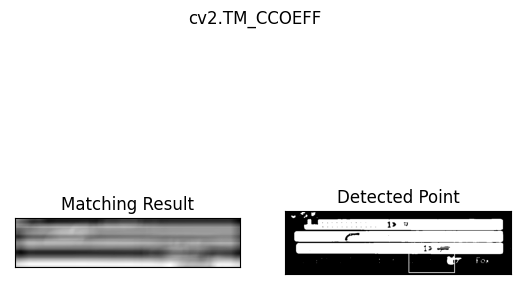

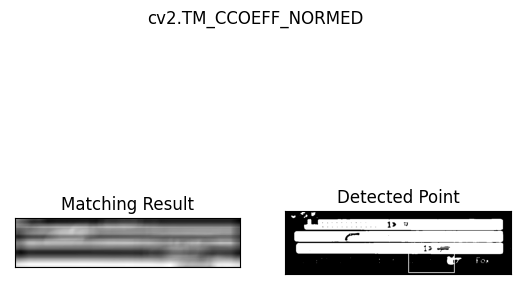

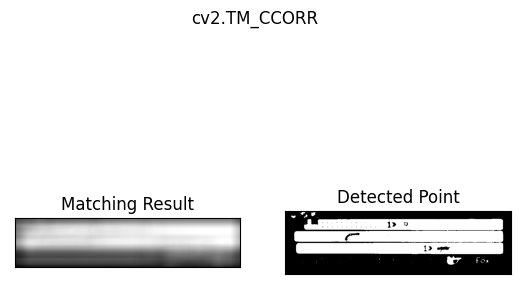

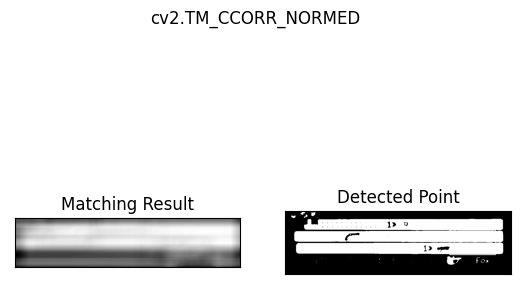

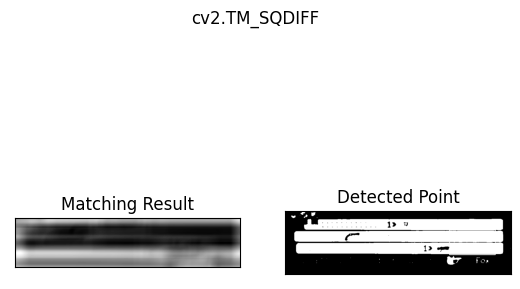

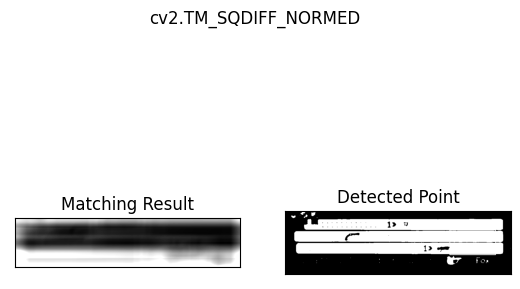

In [14]:
img = preprocess(cv2.imread('../test-data/zoom.png'))
img2 = img.copy()
template = preprocess(cv2.imread('../test-data/t.png'))
img
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()